In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom, betabinom

In [14]:
success_prob = 0.3
data = np.random.binomial(n=1, p=success_prob, size=1000) # sucess is 1, failure is 0.

In [ ]:
# say there are a thousand samples in the binomial distribution, given by b(1000,theta)
# for n trials with k successes, the ML estimator for theta is k/n, which we just plug into the binomial distribution then calculate mse of that as theta*(1-theta)/n
# for the bayesian estimator, we take a beta distribution given as b(a,b) as prior, and the posterior is given as b(a+k,b+n-k), where the first parameter to the bta is the number of successes + 1,
# and the second parameter is the number of failures. In this case our priors (hyperparameters) are A and B. 

In [56]:
# --- Prior parameters ---
alpha_prior = 1   # prior "successes"
beta_prior = 1    # prior "failures"

# --- Observed data ---
n = 1000   # number of trials
k = 500 # number of successes

# --- Posterior parameters ---
alpha_post = alpha_prior + k
beta_post = beta_prior + (n - k)

ml_estimator = k/n
bayes_estimator = (alpha_post + k) / (alpha_post + beta_post + n)
# mle mse is just variance as there is no bias
ml_mse = binom.var(n, ml_estimator)
bayes_mse = binom.var(n, bayes_estimator) + (binom.mean(n, bayes_estimator) - bayes_estimator)**2
print(ml_estimator)
print(bayes_estimator)
print(ml_mse)
print(bayes_mse)

0.5
0.5
250.0
249750.25


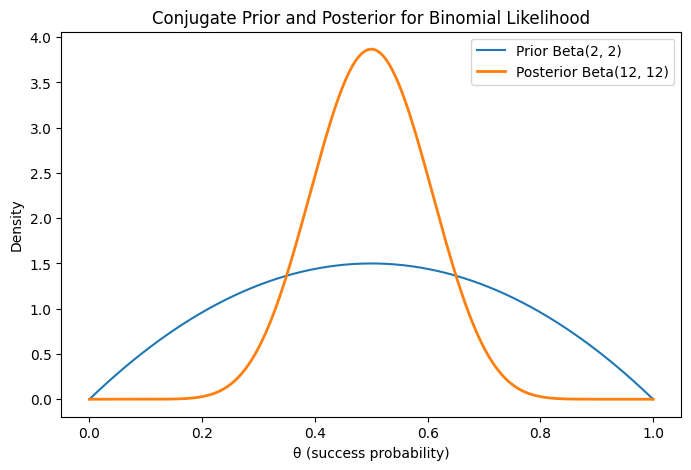

0.5


In [ ]:
# --- Prior parameters ---
alpha_prior = 2   # prior "successes"
beta_prior = 2    # prior "failures"

# --- Observed data ---
n = 20   # number of trials
k = 10   # number of successes

# --- Posterior parameters ---
alpha_post = alpha_prior + k
beta_post = beta_prior + (n - k)

ml_estimator = n/k
bayes_estimator = (alpha_post + k) / (alpha_post + beta_post + n)
# --- Distributions ---
theta = np.linspace(0, 1, 200)
prior_pdf = beta.pdf(theta, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(theta, alpha_post, beta_post)
posterior_pdf.mean
# --- Plot prior vs posterior ---
plt.figure(figsize=(8, 5))
plt.plot(theta, prior_pdf, label=f"Prior Beta({alpha_prior}, {beta_prior})")
plt.plot(theta, posterior_pdf, label=f"Posterior Beta({alpha_post}, {beta_post})", linewidth=2)
plt.title("Conjugate Prior and Posterior for Binomial Likelihood")
plt.xlabel("θ (success probability)")
plt.ylabel("Density")
plt.legend()
plt.show()
print(beta.mean(alpha_post,beta_post))
print(binom.mean())

In [28]:
print(beta.mean(alpha_post,beta_post))
print(alpha_post)
print(beta_post)

0.5
12
12
